# Titanic乘客生存情况分析预测

## 项目背景

Titanic生存预测大概是kaggle上最受欢迎的项目了，有9000多支队伍参加，多年来诞生了无数关于该比赛的经验分享。Titanic海难被认为是20世纪人间十大灾难之一，以此为背景的电影Titanic也称得上电影史上最伟大电影之一，里面的情景给观影人留下了深刻的印象。本次项目准备简要分析一下Titanic获救成员信息并且利用机器学习建模进行乘客生存预测。

## 项目简介 

本项目主要分析Titanic乘员生还率和各因素（客舱等级、乘客性别、年龄、登船港口等）之间的关系，得出**各因素对乘客生存率的影响及利用机器学习建模预测乘客生存情况**。

## 数据源及数据概况

本次项目中，数据是从Kaggle网站上获取的CSV格式数据，数据本身相对完整，不需要再进行数据采集。

数据的关键信息如下：

| 内容    | 字段        |
|:---------- |:------     |
|PassengerId|乘客序号|
|Survived|最终是否存活（1/0表示存活/未存活）|
|Pclass|船舱等级（1/2/3等舱位|
|Name|乘客姓名|
|Sex|性别|
|Age|年龄|
|SibSp|堂兄弟/妹个数 |
|Parch|父母与小孩个数 |
|Ticket|船票信息 |
|Fare|票价 |
|Cabin|客舱编号  |
|Embarked|登船码头（S,C,Q）  |


## 分析目的 

本次项目主要从以下几个问题展开：

1. Titanic电影中一句台词："让女人先走"感动了无数人，而真实事件中，是否如电影剧情那样女性有更多生还机会?男人和女人的获救情况分别是怎样的？
2. 船上乘客年龄分布是怎么样的？哪些年龄段的乘客获救概率比较高？
3. 不同船舱等级的乘客分布情况如何？富人和穷人生还的几率会有怎样的差别呢？
4. 不同港口登船是否会对乘客的生存情况产生影响？
5. 票价对乘客生存情况的影响是怎么样的？
6. 客舱编号信息的有无是否会对乘客生存情况带来影响？
7. 旅行过程中经常有亲属陪伴，那么亲属数量对获救几率有哪些影响？
8. 利用机器学习算法对乘客信息进行建模来预测乘客的生存情况



## 数据探索

### 导入数据

Titanic生存模型预测，其中包含了两组数据：train.csv 和 test.csv，分别为训练集和测试集。

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
from pandas import DataFrame
import numpy as np
from pylab import mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

#导入训练数据
train_data=pd.read_csv('Titanic/train.csv')

#设置中文字体
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
train_data.head()#print

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#导入测试数据
test_data=pd.read_csv('Titanic/test.csv')
#观察test_data数据的缺失情况
test_data.head()#print

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 数据整体情况 

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* train_data数据中有12个字段，包括Survived、Pclass、Name、Sex、Age等，共891条数据，包括有int64、object、float64三种数据类型。其中Age、Cabin、Embarked三个属性有缺失，分别缺少177、687、2条数据。

* test_data数据中有11个字段，相比train_data缺少Survived属性，而这一属性也是最后需要对乘客进行预测的生存情况。其中Age、Fare、Cabin三个属性有缺失，分别缺失86、1、327条数据。

### 数值类型数据分布

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


可以简单看出：


$1. Titanic上乘客平均年龄不到30岁，说明船上以年轻人居多，不过也有少数老年人，其中其中最大年龄为80岁；$

$2. 人员整体获救率比较低，仅有38%，可以想象当时事故的惨烈；$

$3. 票价差异相对较大，其中最贵船票价位为512；$  

$4. 乘客中多数人没有携带亲属；$

$5. 有1/2/3三种船舱等级。$



### 离散类型数据分布 

In [6]:
train_data.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kelly, Mrs. Florence ""Fannie""",male,1601,B96 B98,S
freq,1,577,7,4,644


可以简单分析出Name、Sex、Ticket、Cabin、Embarked这几个字段里：

$1. Name属性唯一，没有重名的现象；$

$2. Sex属性显示比较符合预期，只有男性和女性两种性别，其中男性居多，有577名；$

$3. Cabin属性不是唯一的，推测可能跟家属共用一张船票；$

$4. 登陆港口有三个，其中S港口登陆的最多。$

### 数据概况

接下来分析一下Sex、Pclass、Embarked、Parch、SibSp、Age这几个特征列的分布情况。俗话说字不如表，表不如图。我们还是统计统计，画些图来看看各特征集概况：

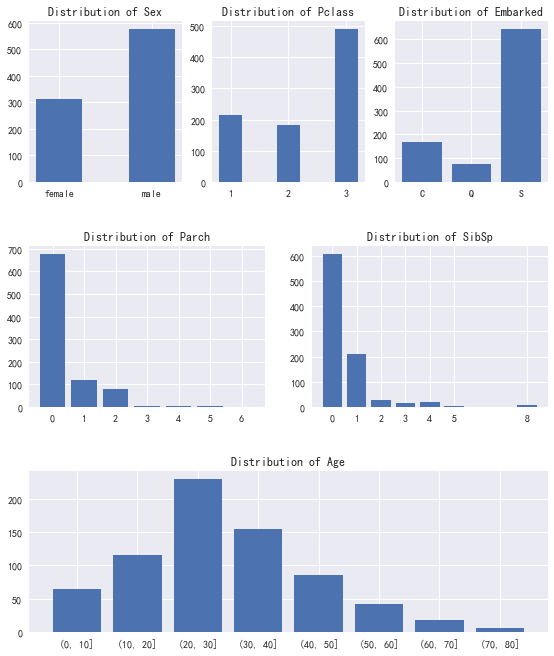

In [7]:
#观察性别特征分布情况
count_by_sex=train_data.groupby('Sex')['Sex'].count()
fig = plt.figure(figsize=(6,8))
ax1 = plt.subplot(331)
rect = ax1.bar(([1,2]),count_by_sex.values ,width = 0.5, align = 'center')
ax1.set_title('Distribution of Sex')

#自定义函数设置X轴刻度：
def add_xtricks(rects,xtricks):
    x = []
    for rect in rects:
        x.append(rect.get_x() + rect.get_width()/2)
    x = tuple(x)
    plt.xticks(x,xtricks)
add_xtricks(rect,count_by_sex.index)

#观察舱位分布情况
count_by_Pclass = train_data.groupby(['Pclass']).Pclass.count()
ax2 = plt.subplot(332)
rect = ax2.bar(count_by_Pclass.index,count_by_Pclass.values,width = 0.4)
add_xtricks(rect,count_by_Pclass.index)

ax2.set_title('Distribution of Pclass')

#观察登船码头分布情况
count_by_Embarked = train_data.groupby(['Embarked']).Embarked.count()
ax3=plt.subplot(333)
rect=ax3.bar(range(len(count_by_Embarked)),count_by_Embarked.values)
add_xtricks(rect,count_by_Embarked.index)
ax3.set_title('Distribution of Embarked')


#观察直系亲属个数分布情况
count_by_Parch=train_data.groupby(['Parch']).Parch.count()
ax5 = plt.subplot(323)
rect=ax5.bar(count_by_Parch.index,count_by_Parch.values)
add_xtricks(rect,count_by_Parch.index)
ax5.set_title('Distribution of Parch')


#观察堂兄弟/妹个数分布情况
count_by_SibSp=train_data.groupby(['SibSp']).SibSp.count()
ax5 = plt.subplot(324)
rect=ax5.bar(count_by_SibSp.index,count_by_SibSp.values)
add_xtricks(rect,count_by_SibSp.index)
ax5.set_title('Distribution of SibSp')


#观察年龄分布情况
#这里笔者将年龄数据按照年龄段分组，能够更加直观清晰了解不同年龄分布
bins =np.arange(0,90,10)
train_data['Age_group'] = pd.cut(train_data['Age'], bins)
drop_null_age =train_data[train_data['Age_group'].notnull()]
count_by_age = drop_null_age.groupby('Age_group')['Name'].count()
ax4 = plt.subplot(313)
rect=ax4.bar(range(len(count_by_age)),count_by_age.values)
add_xtricks(rect,count_by_age.index)
ax4.set_title('Distribution of Age')

#利用subplots_adjust函数调整不同图例之间间距
plt.subplots_adjust(right=1.2, left=0, bottom=0.14, top=1.2, hspace = 0.4)

通过对Sex、Pclass、Age这三个特征进行处理，可以详细的观察出这三个字段的乘客分布情况：


$1. 乘客中，女性少于男性，与上文简单数据描述结果相吻合。$                             

$2. 1/2/3这三种船舱等级乘客数量排序为3>1>2，多数乘客选择了低等舱。$

$3. 可以看出，从S码头登陆的乘客要远多于另外两个码头。$

$4. Parch（父母与小孩）特征列整体呈现左偏分布并且逐渐下降的趋势。超过半数乘客没有携带直系亲属，其中一位乘客携带了6名直系亲属，可谓"拖家带口"了。$
 
$5. SibSp（堂兄弟/妹）这一列跟Parch列整体分布趋势相同，同样有超过半数的乘客没有携带堂兄弟/妹，其中乘客最多的携带了8名堂兄弟/妹。$
 
$6. 年龄分布中间高两端低，总体呈现近似正态分布，乘客人数最多的年龄段为(20,30]。$

### 幸存率与Sex（性别）的关系

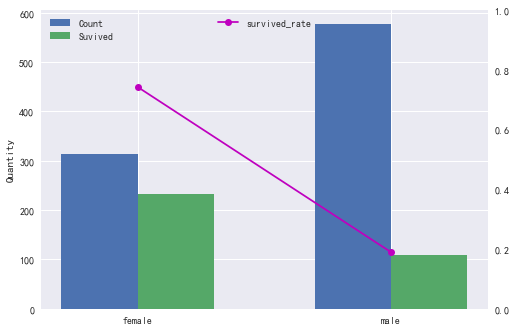

In [8]:
#计算不同性别幸存率
survived_rate_by_sex=train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False)
##计算获救乘员的性别分布
survived_by_sex=train_data.groupby(['Sex'])['Survived'].sum()

#绘制条形图
fig = plt.figure()
ax1 = fig.add_subplot(111)
rect = ax1.bar([0,1],count_by_sex.values,width = 0.3)
rect1 = ax1.bar([.3,1.3], survived_by_sex.values, width = 0.3)
ax1.set_ylabel('Quantity')

#设置图例
plt.legend((rect,rect1),('Count','Suvived'),loc='upper left')

#绘制生还率折线图
ax2 = ax1.twinx()
ax2.set_ylim(0,1)
plt.legend((rect,rect1),('Count','Suvived'),loc='upper left')
plt.grid(False)
x1=[i+0.15 for i in range(len(survived_rate_by_sex))]
y=survived_rate_by_sex.Survived
rect2= ax2.plot(x1,y,'mo-', label = 'right')
#设置X轴标签
plt.xticks([0.15,1.15],count_by_sex.index)
#添加折线图图例
plt.legend((rect2),['survived_rate'],loc='upper center')

以上代码输出可以清晰地看到女性的获救率和获救人数都远远高于男性！Titanic乘客314名女性中获救人数233人，获救率约为74%，而577名男性乘客中，获救的只有109名，比例约为19%。

因此这里可以得出一个结论，Titanic事件中，**女性乘客的生存几率要远远高于男性乘客**，看来电影中那句感人台词“让女人先走”在实际沉船事件中被坚定不移的执行了。

### 幸存率与Age（年龄）的关系

{'boxes': [<matplotlib.lines.Line2D at 0xc545358>],
 'caps': [<matplotlib.lines.Line2D at 0xc550e80>,
 'fliers': [<matplotlib.lines.Line2D at 0xc55e710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc556828>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc545da0>,
  <matplotlib.lines.Line2D at 0xc545f98>]}

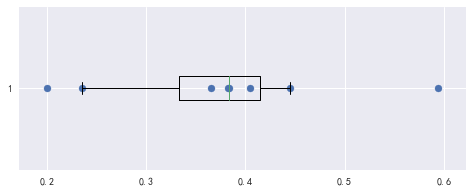

In [9]:
#计算不同年龄段生还人数
survived_by_age= train_data.groupby('Age_group')['Survived'].sum()
#计算不同年龄段幸存率
survived_rate_by_age=survived_by_age.apply(float)/count_by_age.apply(float).round(2)

#绘制箱线图观察各年龄段幸存率分布情况
y = [1 for i in range(len(survived_rate_by_age))]
plt.figure(figsize = [8,3])
plt.scatter(survived_rate_by_age.values,y)
plt.boxplot(survived_rate_by_age.values,vert = False, whis = [10,90]) 

这里使用箱线图可以看出**不同年龄段获救率大多集中在0.2-0.5之间**，每个点分布比较散乱没有比较直观的规律，接下来继续对不同年龄段获救率进行可视化分析。

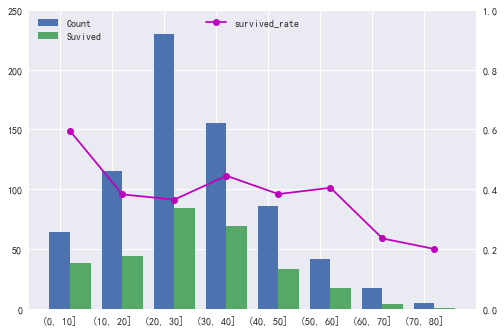

In [10]:
#绘制条形图
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylim(0,250)
rect = plt.bar(range(len(count_by_age)),count_by_age.values, width = 0.4)
x = [i + 0.4 for i in range(len(survived_by_age))]
rect1 = plt.bar(x, survived_by_age.values, width = 0.4)
add_xtricks(rect,count_by_age.index)

#添加图例
plt.legend((rect,rect1),('Count','Suvived'),loc='upper left')

#绘制不同年龄段幸存率折线图
ax2 = ax1.twinx()#利用twinx函数使同一个图显示两个Y轴
#设置Y轴刻度
ax2.set_ylim(0,1)
plt.grid(False)
x1=[i + 0.2 for i in range(len(survived_by_age))]
y=survived_rate_by_age.values
rect2= ax2.plot(x1,y,'mo-', label = 'right')
#添加折线图图例
plt.legend((rect2),['survived_rate'],loc='upper center')

可以看出：


*1. 不同年龄段获救乘客人数的年龄分布与总乘客人数分布的形态比较相似，也是中间高两头低。*

*2. 获救率最高的年龄段为（0,10]年龄段，达到了60%左右。*

*3. 生存率最低的为(70,80]年龄段，获救率仅为20%左右，结合前面的分析可以看出，唯一的幸存者，也是年龄最大的一位，达到了80岁高龄。*

*4. 乘客人数最多的青年（20,30]人群获救率却相对比较低，仅为32%左右。*

*5. 中年（30,60]人群获救率大多集中在40%左右，跟总的乘客生还率38%比较接近。*

    上面这些结论与有点出乎意料。一般来讲，由于生理上的差异，在面对灾难时，青壮年群体的生还率要显著高于儿童。但是我们可以看到在Titanic沉船事件中并非如此，青年（20,30]生还率远低于儿童(0,10]群体，笔者猜测或许（20,30]年龄段正是年轻热血的时期，在面对灾难的时候，许多人就像电影里的主角Jack一样，将生还的机会给了自己的爱人、亲人或者朋友，而自己从容赴死。

### 幸存率与Pclass的关系 

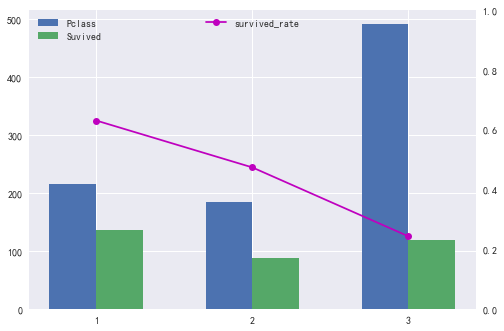

In [11]:
#计算不同船舱等级的幸存人数
survived_by_Pclass=train_data.groupby(['Pclass'])['Survived'].sum().round(2)
#计算不同船舱等级幸存率
survived_rate_by_Pclass=survived_by_Pclass.apply(float)/count_by_Pclass.apply(float).round(2)

#绘制条形图进行可视化分析
fig = plt.figure()
ax1 = fig.add_subplot(111)
rect=ax1.bar(count_by_Pclass.index,count_by_Pclass.values,width=0.3)
rect1=ax1.bar(survived_by_Pclass.index+0.3,survived_by_Pclass.values,width=0.3)
#设置x轴标签
plt.xticks(count_by_Pclass.index + 0.15,count_by_Pclass.index)
plt.legend((rect,rect1),('Pclass','Suvived'),loc='upper left')

#绘制不同船舱等级幸存率折线图
ax2=ax1.twinx()
plt.grid(False)
ax2.set_ylim(0,1)
ax2.plot(survived_rate_by_Pclass.index+0.15,survived_rate_by_Pclass.values,'mo-', label = 'right')
plt.legend((rect2),['survived_rate'],loc='upper center')

这张图可以得出非常明确的信息：

1. 生存人数方面来看，1等舱生存人数最多，其次是3等舱，2等舱生存人数最少。

2. 1等舱生还比例最高，为63%左右；2等舱次之，3等舱最低。 这是非常明显的阶梯型的差异，1等舱乘客的生还率远高于3等舱，是两倍还多。

推测造成这种结果的原因有两种：

* 一般3等舱处于船舱最底部，也是发生海难时最危险的舱室，而1等舱处于上部，有较多的时间用于逃生。

* 头等舱周围救生配置远高于别的船舱，因此就登船地利方面来说，登船优先级：1>2>3。

总之可以得出明确结论：**在Titanic沉船事件中，相对富有的人（1等舱乘客）生还率远高于相对贫穷的人（3等舱乘客）**。

###  幸存率与Embarked的关系

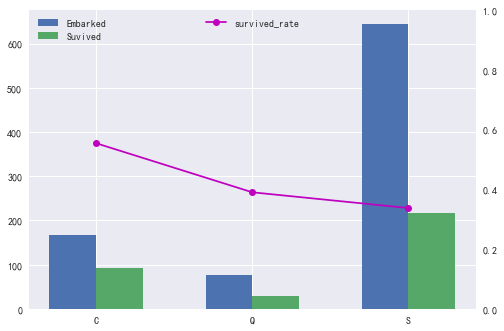

In [12]:
#计算不同登船码头获救乘客人数
survived_by_Embarked= train_data.groupby('Embarked')['Survived'].sum()
#计算不同登船码头幸存率
survived_rate_by_Embarked=survived_by_Embarked.apply(float)/count_by_Embarked
#绘制条形图
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = [i for i in range(len(count_by_Embarked))]
rect=ax1.bar(x, count_by_Embarked.values,width=0.3)
x1=[i+0.3 for i in range(len(survived_by_Embarked))]
rect1=ax1.bar(x1,survived_by_Embarked.values,width=0.3)
#设置x轴标签
plt.xticks([0.15,1.15,2.15],count_by_Embarked.index)
plt.legend((rect,rect1),('Embarked','Suvived'),loc='upper left')

#绘制不同登船码头幸存率折线图
ax2=ax1.twinx()
plt.grid(False)
ax2.set_ylim(0,1)
x2= [i+0.15 for i in range(len(survived_by_Embarked))]
ax2.plot(x2,survived_rate_by_Embarked.values,'mo-', label = 'right')
plt.legend((rect2),['survived_rate'],loc='upper center')

通过以上分析可以看出：

1. 从生存人数来看，S码头登船的乘客生存人数最多，C码头次之，Q码头最少。
2. 在**不同的港口登船，生还率不同，C码头乘客幸存率最高，Q码头次之，S码头生还率最少。**
              

### 幸存率与Fare的关系

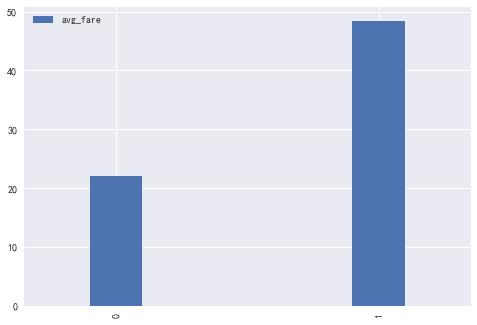

In [13]:
fare_survived = train_data['Fare'][train_data['Survived']==1]
fare_no_survived = train_data['Fare'][train_data['Survived']==0]
avgerage_fare = pd.DataFrame([fare_no_survived.mean() ,fare_survived.mean()],columns=['avg_fare']).round(1)

avgerage_fare.plot.bar(width=0.2)

这里可以清晰地看到，**票价与获救情况有一定相关性，以平均票价来看，获救乘客明显高于未获救乘客**，至于产生这种结果的原因，笔者认为票价高的乘客应该集中在1、2等舱里，这样就比较容易解释为何票价会影响乘客的获救情况了。

### 幸存率与Cabin有无的关系 

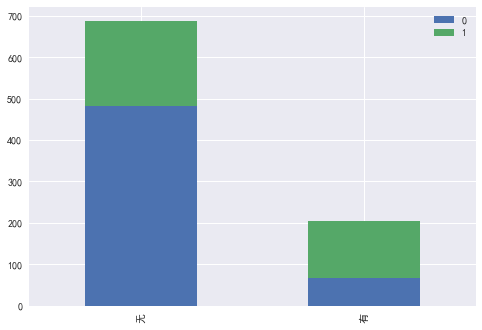

In [14]:
#Cabin缺失值比较多，可以先把Cabin缺失与否作为条件进行简要分析
Survived_cabin = train_data.Survived[pd.notnull(train_data.Cabin)].value_counts()
Survived_nocabin = train_data.Survived[pd.isnull(train_data.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()

#绘图简单分析有无Cabin对幸存率的影响
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
df.plot(kind='bar', stacked=True)
plt.show()

可以看出，上图显示在**有Cabin数据的乘客的幸存人数所占比例远高于无Cabin数据的乘客**，所以我们可以将Cabin的有无数据作为一个特征。

### 幸存率与 Relative的关系

    由于SibSp（堂兄弟/妹）和Parch（直系亲属）同属于亲属行列，这里为了方便观察分析，可以将之合并为Relative（亲属）这一组合项进行简单的分析，同时也保留这两项原始特征列进行后续建模分析。

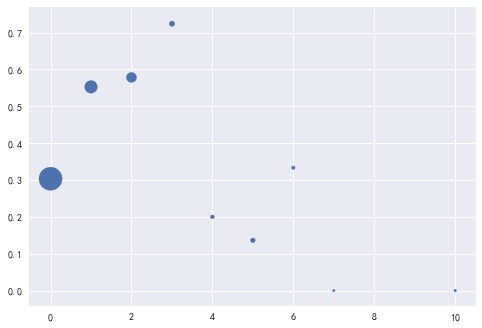

In [15]:
train_data['Relative']=train_data['SibSp']+train_data['Parch']
count_by_Relative=train_data.groupby(['Relative']).Parch.count()
survived_by_Relative=train_data.groupby(['Relative'])['Survived'].sum()
survived_rate_by_Relative=survived_by_Relative.apply(float)/count_by_Relative.apply(float).round(2)
survived_rate_by_Relative
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(count_by_Relative.index, survived_rate_by_Relative.values, s=count_by_Relative.values)  # 第三个变量表明根据收入气泡的大小
plt.show()

从气泡图中可以看出：

1. Titanic沉船事件中，**当乘客携带3名亲属时，获救率最高，约为72%左右**。
2. 可以看出，在**携带0-3名亲属时，随着亲属数量的增加，获救几率在随之增大**，看来跟三两亲属同行能显著增加乘客的获救率。但是获救率和亲属数量并不是呈正比例增加，在4名亲属时生存率显著降低，仅有20%左右，不过由于4-10名亲属的乘客数量基数较少，计算出的生还率不具备显著的统计学意义，暂不进行深入探究。

## 简单数据预处理 

在上面的分析过程中，对各属性已经有了大致的了解，同时也简单的分析了各特征与幸存率之间的关系。接下来在机器学习建模前，需要对这些特征数据进行数据预处理。

### 缺失值处理 

train_data数据集中，其中Cabin,Age,Embarked三个属性有缺失，而通过之前分析，这三个属性都对Survived有影响，因此需要补全缺失值。

* Cabin属性为非连续值特征属性，可以按Cabin有无数据，将这个属性处理成Yes和No两种类型。
* Embarked属性缺失较少，可以直接用众数来填充。
* Age属性缺失值样本适中，可以用scikit-learn中的RandomForest根据已有数据来拟合缺失的年龄数据。

In [16]:
#将之前添加的特征列Age_group,Relative删除
train_data.drop(['Age_group','Relative'], axis=1, inplace=True)

#自定义函数，将有Cabin的数据作为Yes，Cabin缺失的数据作为No
def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin']='Yes'
    df.loc[(df.Cabin.isnull()),'Cabin']='No'
    return df
train_data = set_Cabin_type(train_data)

#Embarked特征列缺失值以众数来填充
train_data['Embarked'].fillna(train_data['Embarked'].mode().iloc[0], inplace=True)

from sklearn.ensemble import RandomForestRegressor
#选择已有特征数值选出来进行预测年龄
age_df = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
#将年龄分为有缺失和无缺失两种
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
#X为特征属性值
X = age_df_notnull.values[:,1:]
#Y为目标年龄
Y = age_df_notnull.values[:,0]
# 使用RandomForestRegression进行预测
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
# fit到RandomForestRegressor之中
RFR.fit(X,Y)
#用得到的模型进行预测未知年龄
predictAges = RFR.predict(age_df_isnull.values[:,1:])
#将预测出的年龄填补缺失数值
train_data.loc[train_data['Age'].isnull(), ['Age']]= predictAges

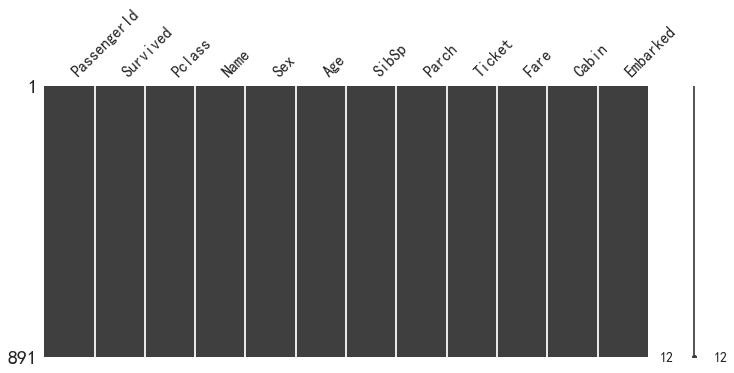

In [17]:
#除了info函数，还有另一种‘高大上’的利用可视化的方法查看缺失值情况
import missingno as msno
msno.matrix(train_data,figsize=(12,5))

可以看到，此时缺失值已经被基本处理完了，另外做逻辑回归建模时，需要输入的特征都是数值型特征，因此要将一些非数字型的原始数据转换为数字型numeric。

###  数值定性转换

In [18]:
#使用pandas的‘get_dummies’函数进行变量转换
dummies_Cabin=pd.get_dummies(train_data['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(train_data['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(train_data['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(train_data['Pclass'], prefix= 'Pclass')

df_dummies = pd.concat([train_data, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
#删除原始无用特征列
df_dummies.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_dummies.head()#print

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1


## 逻辑回归建模 

In [19]:
#导入回归模型
from sklearn import linear_model
#用正则取出需要的属性值
train_df=df_dummies.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
#利用as_matrix函数进行矩阵转换
train_np=train_df.as_matrix()

# X即特征属性值
X = train_np[:, 1:]

#y即Survival结果
y = train_np[:, 0]

#建立逻辑斯蒂回归算法模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)

##训练数据进行模型学习
clf.fit(X,y)
clf#print

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

如上，顺利的得到了一个LogisticRegression模型，不过此时万里长征只行进了一半，接下来还需要对测试集做和'train_data'相同的预处理。

### test_data数据处理

In [20]:
#test数据中一个Fare变量是空值，用fillna()方法进行中位数填充
test_data['Fare'].fillna(test_data['Fare'].median(),inplace=True)

#与train_data数据相同，这里使用RandomForestRegressor对test_data数据的Age特征列缺失值进行预测
age_df = test_data[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(test_data['Age'].notnull())]
age_df_isnull = age_df.loc[(test_data['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# 建立RandomForestRegression模型
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
#对未知Age特征数据进行预测
predictAges = RFR.predict(age_df_isnull.values[:,1:])
test_data.loc[test_data['Age'].isnull(), ['Age']]= predictAges

#使用自定义函数set_Cabin_type对test_data数据的Cabin进行相同处理
test_data = set_Cabin_type(test_data)

#进行缺失值处理之后检查test_data数据集
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


可以看到，经过处理后test_data数据缺失值已经被处理完成了，接下来继续对test_data进行数值转换。

In [21]:
#对test数据集做相同的变量转换
dummies_Cabin = pd.get_dummies(test_data['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(test_data['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(test_data['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(test_data['Pclass'], prefix= 'Pclass')
df_test = pd.concat([test_data, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
#利用drop函数删除原始无用特征列
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1


数据看起来很OK，现在万事俱备，只差最后一步对test_data做预测得出结果了。

### 结果预测 

In [22]:
#用正则取出需要的测试集属性值
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
#使用模型对test进行预测
predictions = clf.predict(test)
#将结果生成为一个DataFrame
result = pd.DataFrame({'PassengerId':test_data['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


数据格式正确，导出数据并提交预测出的结果

In [23]:
#导出数据
result.to_csv('Titanic/logistic_regression_predictions.csv')

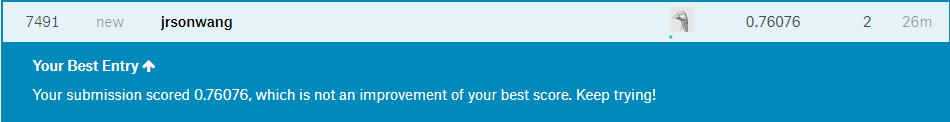

本次参加kaggle竞赛得分为0.76076，第一次参加比赛，分数有点不尽人意啊。

## 分析总结 

此项目使用pandas库对数据进行了整理和计算，使用matplotlib库的pyplot模块将数据可视化分析，并利用sklearn机器学习库对乘客信息进行建模预测，顺利的解决了在项目开始时提出的问题。但是不得不提的是，本次建模过程仅仅经过简单的分析处理，并没有对逻辑回归模型进行系统优化和交叉验证等，希望下次能够对建模过程更加严谨完善，争取得到更高的分数。